<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2007%20-%20CNN%20Implementation/Lecture_07_SOTA_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import (
    VGG16, ResNet50, InceptionV3, Xception, EfficientNetB0, EfficientNetB7, MobileNetV2, DenseNet201, DenseNet121, ResNet101, ResNet152, MobileNetV3Large,MobileNetV3Small, MobileNet
)
import pandas as pd
import numpy as np
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
def build_lenet(input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='tanh', input_shape=input_shape),
        layers.AveragePooling2D(pool_size=(2,2), strides=2),
        layers.Conv2D(16, (5,5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2,2), strides=2),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


def build_alexnet(input_shape=(227, 227, 3), num_classes=1000):
    model = models.Sequential([
        layers.Conv2D(96, (11,11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3,3), strides=2),
        layers.Conv2D(256, (5,5), padding='same', activation='relu'),
        layers.MaxPooling2D((3,3), strides=2),
        layers.Conv2D(384, (3,3), padding='same', activation='relu'),
        layers.Conv2D(384, (3,3), padding='same', activation='relu'),
        layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((3,3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model




In [ ]:
models_dict = {
    "LeNet": build_lenet,
    "AlexNet": build_alexnet,
    "VGG16": VGG16,
    "ResNet50": ResNet50,
    "ResNet101": ResNet101,
    "ResNet152": ResNet152,
    "InceptionV3": InceptionV3,
    "DenseNet121": DenseNet121,
    "DenseNet201": DenseNet201,
    "EfficientNetB0": EfficientNetB0,
    "EfficientNetB7": EfficientNetB7,
    "MobileNet": MobileNet,
    "MobileNetV2": MobileNetV2,
    "MobileNetV3L": MobileNetV3Large,
    "MobileNetV3S": MobileNetV3Small
}

results = []

for name, model_fn in models_dict.items():
    print(f"\n===== {name} =====")
    if name in ["LeNet", "AlexNet"]:
        model = model_fn()
    else:
        model = model_fn(weights=None, include_top=True)  # no pretrained weights, keep classifier head

    params = model.count_params()
    results.append({"Architecture": name, "Parameters": params})

    print(f"[{name}]: {params:,}\n")




===== LeNet =====
[LeNet]: 61,706


===== AlexNet =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[AlexNet]: 62,378,344


===== VGG16 =====
[VGG16]: 138,357,544


===== ResNet50 =====
[ResNet50]: 25,636,712


===== ResNet101 =====
[ResNet101]: 44,707,176


===== ResNet152 =====
[ResNet152]: 60,419,944


===== InceptionV3 =====
[InceptionV3]: 23,851,784


===== DenseNet121 =====
[DenseNet121]: 8,062,504


===== DenseNet201 =====
[DenseNet201]: 20,242,984


===== EfficientNetB0 =====
[EfficientNetB0]: 5,330,571


===== EfficientNetB7 =====
[EfficientNetB7]: 66,658,687


===== MobileNet =====
[MobileNet]: 4,253,864


===== MobileNetV2 =====
[MobileNetV2]: 3,538,984


===== MobileNetV3L =====
[MobileNetV3L]: 5,507,432


===== MobileNetV3S =====
[MobileNetV3S]: 2,554,968



In [ ]:
df = pd.DataFrame(results)
print(df.to_string(index=False))

  Architecture  Parameters
         LeNet       61706
       AlexNet    62378344
         VGG16   138357544
      ResNet50    25636712
     ResNet101    44707176
     ResNet152    60419944
   InceptionV3    23851784
   DenseNet121     8062504
   DenseNet201    20242984
EfficientNetB0     5330571
EfficientNetB7    66658687
     MobileNet     4253864
   MobileNetV2     3538984
  MobileNetV3L     5507432
  MobileNetV3S     2554968


In [ ]:

def build_shallow_cnn(activation_='relu'):
    model = models.Sequential([
        layers.Conv2D(16, (3,3), activation=activation_, padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32, (3,3), activation=activation_, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation_),
        layers.Dense(10, activation='softmax')
    ])
    return model

def build_deep_cnn(activation_='relu'):
    model = models.Sequential([
        layers.Conv2D(16, (3,3), activation=activation_, padding='same', input_shape=(32,32,3)),
        layers.Conv2D(16, (3,3), activation=activation_, padding='same'),
        layers.Conv2D(32, (3,3), activation=activation_, padding='same'),
        layers.Conv2D(32, (3,3), activation=activation_, padding='same'),
        layers.Conv2D(64, (3,3), activation=activation_, padding='same'),
        layers.Conv2D(64, (3,3), activation=activation_, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation=activation_, padding='same'),
        layers.Conv2D(128, (3,3), activation=activation_, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation_),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#y_train_cat = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

# Small subset for fast illustration
x_train, y_train = x_train[:50000], y_train[:50000]
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2, random_state=42)

x_test, y_test = x_test[:10000], y_test[:10000]



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
def train_model(model, model_name, epochs):
  # Callbacks: EarlyStopping + ModelCheckpoint
  checkpoint_cb = callbacks.ModelCheckpoint(
      filepath=f'{model_name}_best.weights.h5',
      monitor='val_loss',
      save_best_only=True,
      save_weights_only=True,
      verbose=1
  )
  earlystop_cb = callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      restore_best_weights=True,
      verbose=1
  )

  model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

  history = model.fit(
      x_train, y_train,
      validation_data=(x_val, y_val),
      epochs=100,
      batch_size=32,
      callbacks=[checkpoint_cb, earlystop_cb]
  )

  return history

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'{model_name} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'{model_name} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# The Vanish Gradient

In [ ]:
models_dict = {
    'Shallow_Relu': {
        'builder': build_shallow_cnn,
        'activation': 'relu',
        'weights_file': 'Shallow_Relu_best_weights.h5',
        'model': None,
        'history': None
    },
    'Shallow_Sigmoid': {
        'builder': build_shallow_cnn,
        'activation': 'sigmoid',
        'weights_file': 'Shallow_Sigmoid_best_weights.h5',
        'model': None,
        'history': None
    },
    'Deep_Relu': {
        'builder': build_deep_cnn,
        'activation': 'relu',
        'weights_file': 'Deep_Relu_best_weights.h5',
        'model': None,
        'history': None
    },
    'Deep_Sigmoid': {
        'builder': build_deep_cnn,
        'activation': 'sigmoid',
        'weights_file': 'Deep_Sigmoid_best_weights.h5',
        'model': None,
        'history': None
    }
}

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

name = 'Shallow_Relu'
model_info = models_dict[name]
model = model_info['builder'](activation_=model_info['activation'])
model_info['model'] = model
model_info['history'] = train_model(model, model_name=name, epochs=50)

Epoch 1/100
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3710 - loss: 1.7140
Epoch 1: val_loss improved from inf to 1.22242, saving model to Shallow_Relu_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3714 - loss: 1.7131 - val_accuracy: 0.5707 - val_loss: 1.2224
Epoch 2/100
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5831 - loss: 1.1753
Epoch 2: val_loss improved from 1.22242 to 1.07465, saving model to Shallow_Relu_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5831 - loss: 1.1752 - val_accuracy: 0.6234 - val_loss: 1.0747
Epoch 3/100
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 1.0235
Epoch 3: val_loss improved from 1.07465 to 1.01749, saving model to Shallow_Relu_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6391 - loss: 1.0234 - val_accuracy: 0.6441 - val_loss: 1.0175
Epoch 4/100
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.921

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

name = 'Shallow_Sigmoid'
model_info = models_dict[name]
model = model_info['builder'](activation_=model_info['activation'])
model_info['model'] = model
model_info['history'] = train_model(model, model_name=name, epochs=50)

Epoch 1/100
1236/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1450 - loss: 2.2465
Epoch 1: val_loss improved from inf to 1.87667, saving model to Shallow_Sigmoid_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1459 - loss: 2.2447 - val_accuracy: 0.3253 - val_loss: 1.8767
Epoch 2/100
1238/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3469 - loss: 1.8111
Epoch 2: val_loss improved from 1.87667 to 1.66805, saving model to Shallow_Sigmoid_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3471 - loss: 1.8106 - val_accuracy: 0.3955 - val_loss: 1.6680
Epoch 3/100
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4239 - loss: 1.6223
Epoch 3: val_loss improved from 1.66805 to 1.55768, saving model to Shallow_Sigmoid_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4240 - loss: 1.6221 - val_accuracy: 0.4373 - val_loss: 1.5577
Epoch 4/100
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4618 - loss

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

name = 'Deep_Relu'
model_info = models_dict[name]
model = model_info['builder'](activation_=model_info['activation'])
model_info['model'] = model
model_info['history'] = train_model(model, model_name=name, epochs=50)

Epoch 1/100
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2918 - loss: 1.8893
Epoch 1: val_loss improved from inf to 1.27750, saving model to Deep_Relu_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2922 - loss: 1.8884 - val_accuracy: 0.5463 - val_loss: 1.2775
Epoch 2/100
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5678 - loss: 1.2156
Epoch 2: val_loss improved from 1.27750 to 1.02885, saving model to Deep_Relu_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.5679 - loss: 1.2153 - val_accuracy: 0.6351 - val_loss: 1.0289
Epoch 3/100
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6625 - loss: 0.9519
Epoch 3: val_loss improved from 1.02885 to 0.96087, saving model to Deep_Relu_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6625 - loss: 0.9517 - val_accuracy: 0.6629 - val_loss: 0.9609
Epoch 4/100
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7214 - loss: 0.7963
Epo

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

name = 'Deep_Sigmoid'
model_info = models_dict[name]
model = model_info['builder'](activation_=model_info['activation'])
model_info['model'] = model
model_info['history'] = train_model(model, model_name=name, epochs=50)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0983 - loss: 2.3568
Epoch 1: val_loss improved from inf to 2.31428, saving model to Deep_Sigmoid_best.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.0983 - loss: 2.3568 - val_accuracy: 0.0973 - val_loss: 2.3143
Epoch 2/100
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1010 - loss: 2.3095
Epoch 2: val_loss did not improve from 2.31428
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1010 - loss: 2.3095 - val_accuracy: 0.0973 - val_loss: 2.3144
Epoch 3/100
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1012 - loss: 2.3095
Epoch 3: val_loss did not improve from 2.31428
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1012 - loss: 2.3095 - val_accuracy: 0.0973 - val_loss: 2.3144
Epoch 4/100
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1010 - loss: 2.3095
Epoch 4: val_loss did not improve from 2.31428
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - 

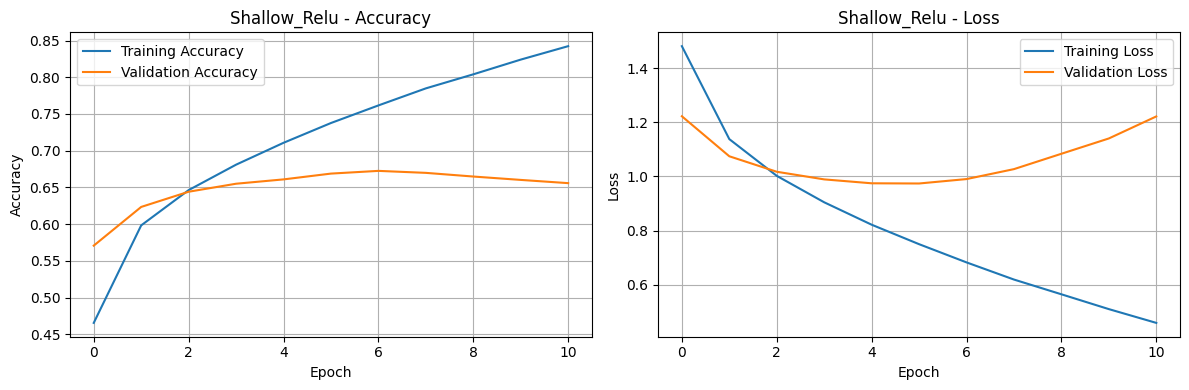

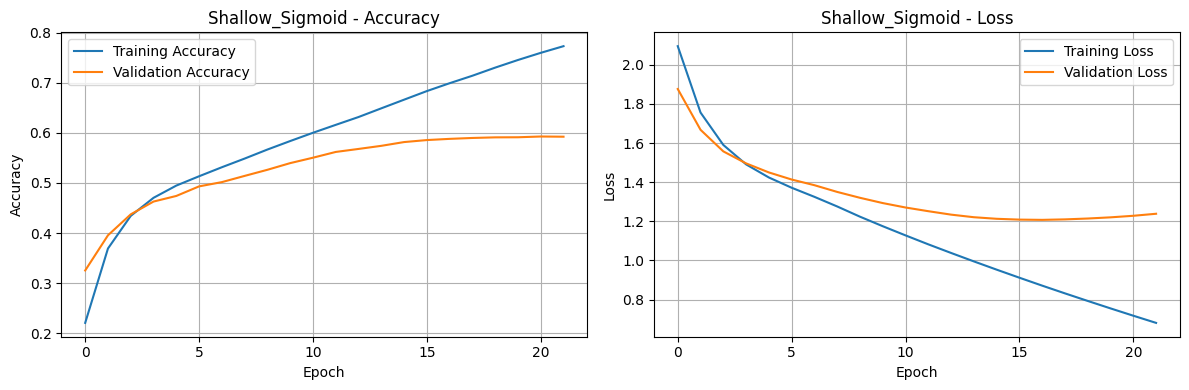

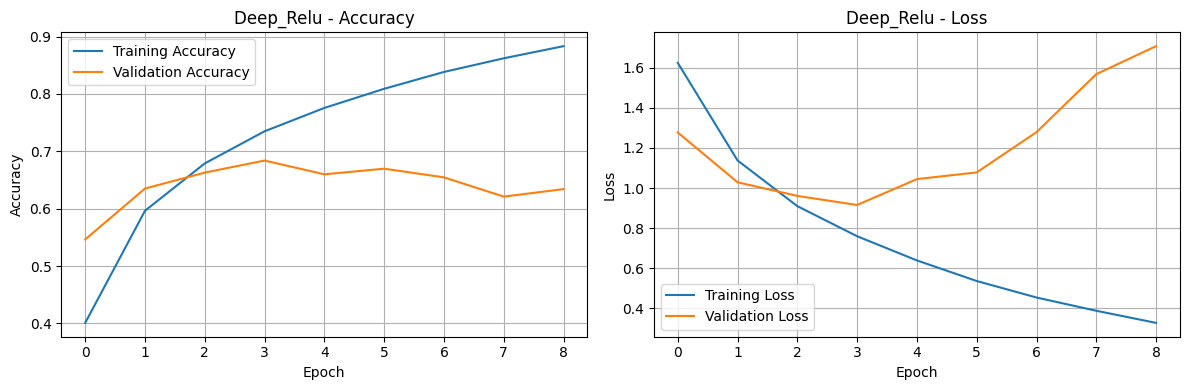

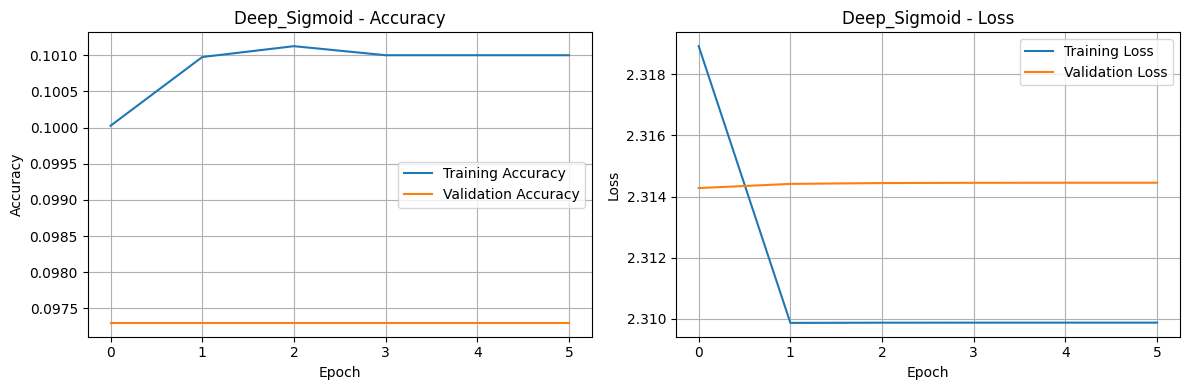

In [ ]:
for name, model_info in models_dict.items():
    model = model_info['model']
    plot_history(model.history, name)
